I IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import requests

II IMPORT DATASETS FOR ANALYSIS AND PREPARE FOR MERGING

from LOCAL

In [2]:
# import the local file
localDataset=pd.read_csv(r'open_weekly_food.csv', index_col=0)
localDataset.shape

(105683, 34)

In [3]:
# & preparing for merging by adding a unique id (this is because the CSV often saves locally the existing 'submission_id' variable in a 'funny' way i.e. 5.308580e+15 vs API saved 5308575264276480, so creating straigh away a 'unique_id' column that = number of rows is an easy workaround, otherwise later could remove duplicates using 'submission_id' as well)
localDataset = localDataset.assign(unique_id=range(len(localDataset)))

In [4]:
localDataset.head(2)

,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,cereals_plantains_tubers_7days,vegs_7days,...,help_from_others_outside_country_7days,spend_food_savings_7days,sell_or_exchange_property_7days,work_in_exchange_for_food_7days,food_purchased_7days,food_purchased_from_7days,food_transferred_7days,avg_distance_traveled_for_food_7days,head_household,unique_id
submission_id,,,,,,,,,,,,,,,,,,,,,
5.308580e+15,10/06/2020,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,I am doing community or military service,Nueva Esparta,1,4,...,0.0,3.0,0.0,4.0,3,Butcher shop^Grocery store^Market,Bicycle^On foot,.5-1 kilometer,Yes,0
6.044580e+15,29/05/2020,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,I am doing community or military service,Nueva Esparta,2,5,...,0.0,2.0,1.0,1.0,1,Market,On foot,.5-1 kilometer,Yes,1


from ADDRESS

In [5]:
# create a request
webDatasetReq = requests.get("https://data.humdata.org/dataset/c287ee2b-6350-481d-82cc-507473813c57/resource/b96c27f1-4108-405d-bb8d-e8307bfb8a92/download/open_weekly_food.csv")
# save the file locally
open('open_weekly_food_web.csv', 'wb').write(webDatasetReq.content)

# open local file just downloaded
webDataset=pd.read_csv(r'open_weekly_food_web.csv', index_col=0)
webDataset.shape

(105683, 34)

In [6]:
# prepare file from address for merging by adding a unique id (to match the previous operation on the localDataset)
webDataset = webDataset.assign(unique_id=range(len(webDataset)))

In [7]:
webDataset.head(2)

,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,cereals_plantains_tubers_7days,vegs_7days,...,help_from_others_outside_country_7days,spend_food_savings_7days,sell_or_exchange_property_7days,work_in_exchange_for_food_7days,food_purchased_7days,food_purchased_from_7days,food_transferred_7days,avg_distance_traveled_for_food_7days,head_household,unique_id
submission_id,,,,,,,,,,,,,,,,,,,,,
5308575264276480,2020-06-10,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,I am doing community or military service,Nueva Esparta,1,4,...,0.0,3.0,0.0,4.0,3,Butcher shop^Grocery store^Market,Bicycle^On foot,.5-1 kilometer,Yes,0
6044576395821056,2020-05-29,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,I am doing community or military service,Nueva Esparta,2,5,...,0.0,2.0,1.0,1.0,1,Market,On foot,.5-1 kilometer,Yes,1


III MERGE THE TWO DATASETS

In [8]:
# create a new DataFrame
mergedDataset = pd.concat([localDataset, webDataset])

# save the DataFrame into a new csv file
mergedDataset.to_csv("open_weekly_food_merged.csv", sep=',', index=False)
# check if it worked and the number of observations has doubled
mergedDataset.shape

(211366, 35)

IV CLEAN UP THE DATASET FOR ANALYSIS (DUPLICATES, NAs, INDEXING) + GENERAL OVERVIEW

In [9]:
#drop duplicates (i.e. in practice undoing the merge & making the file for analysis half the size)
mergedDataset.drop_duplicates(subset='unique_id', keep='first', inplace=True)

In [10]:
#save again the 'cleaned' file 
mergedDataset.to_csv("open_weekly_food_droppedduplicates.csv", sep=',', index=False)

In [11]:
#check if worked and the number of observations is back to the original shape
mergedDataset.shape

(105683, 35)

In [12]:
#checking for % NAs
mergedDataset.isna().sum()/len(mergedDataset) * 100

submission_date                               0.000000
gender                                        0.000000
age                                           0.000000
geography                                     0.000000
financial_situation                           0.000000
education                                     0.000000
employment_status                             0.000000
submission_state                              0.000000
cereals_plantains_tubers_7days                0.000000
vegs_7days                                    0.000000
fruits_7days                                  0.000000
meat_eggs_seafood_7days                       0.000000
grains_7days                                  0.000000
dairy_7days                                   0.000000
oils_fats_7days                               0.000000
sugars_7days                                  0.000000
cheap_food_7days                              0.209116
skip_food_7days                               0.209116
portion_re

In [13]:
#the NAs do not affect the columns I will need for the Food Consumption Score analysis i.e.:
#cereals_plantains_tubers_7days                0.000000
#vegs_7days                                    0.000000
#fruits_7days                                  0.000000
#meat_eggs_seafood_7days                       0.000000
#grains_7days                                  0.000000
#dairy_7days                                   0.000000
#oils_fats_7days                               0.000000
#sugars_7days                                  0.000000

#and number of NAs is not significant for the variables I might want to search for relationships with later on so will NOT use here mergedDataset.dropna(inplace=True)

In [14]:
#reset my index now that the data has been sufficiently cleaned
mergedDataset.reset_index(inplace=True)
mergedDataset.index

RangeIndex(start=0, stop=105683, step=1)

In [15]:
#have a look at the structure
mergedDataset.head(2)

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,cereals_plantains_tubers_7days,...,help_from_others_outside_country_7days,spend_food_savings_7days,sell_or_exchange_property_7days,work_in_exchange_for_food_7days,food_purchased_7days,food_purchased_from_7days,food_transferred_7days,avg_distance_traveled_for_food_7days,head_household,unique_id
105681,5.589240e+15,12/02/2021,Female,26 to 35 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",Technical school diploma or degree completed,I am unemployed,Anzoátegui,7,...,0.0,6.0,1.0,1.0,4,Market^Supermarket,Other,.5-1 kilometer,Yes,105681
105682,6.064260e+15,10/12/2020,Female,26 to 35 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",Technical school diploma or degree completed,I am unemployed,Anzoátegui,2,...,0.0,4.0,2.0,3.0,3,Grocery store,On foot,.5-1 kilometer,Yes,105682


In [85]:
mergedDataset.tail(2)

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,cereals_plantains_tubers_7days,...,food_purchased_from_7days,food_transferred_7days,avg_distance_traveled_for_food_7days,head_household,unique_id,FCS_category4,FCS_category3,FCS_category2,FCS_category,FCS_calculation
105681,5.589240e+15,2021-02-12,Female,26 to 35 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",Technical school diploma or degree completed,I am unemployed,Anzoátegui,7,...,Market^Supermarket,Other,.5-1 kilometer,Yes,105681,FCS Acceptable,FCS Acceptable,FCS Acceptable,FCS Acceptable,76.0
105682,6.064260e+15,2020-12-10,Female,26 to 35 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",Technical school diploma or degree completed,I am unemployed,Anzoátegui,2,...,Grocery store,On foot,.5-1 kilometer,Yes,105682,FCS Poor,FCS Poor,FCS Poor,FCS Poor,19.5


In [16]:
#couple of other general looks in case something else jumps out
mergedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105683 entries, 0 to 105682
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   submission_id                               105683 non-null  float64
 1   submission_date                             105683 non-null  object 
 2   gender                                      105683 non-null  object 
 3   age                                         105683 non-null  object 
 4   geography                                   105683 non-null  object 
 5   financial_situation                         105683 non-null  object 
 6   education                                   105683 non-null  object 
 7   employment_status                           105683 non-null  object 
 8   submission_state                            105683 non-null  object 
 9   cereals_plantains_tubers_7days              105683 non-null  int64  
 

<bound method NDFrame.describe of         submission_id submission_date  gender                 age  \
0        5.308580e+15      10/06/2020    Male  26 to 35 years old   
1        6.044580e+15      29/05/2020    Male  26 to 35 years old   
2        5.276900e+15      17/06/2020    Male  26 to 35 years old   
3        4.779190e+15      07/06/2020    Male  26 to 35 years old   
4        6.647450e+15      23/07/2020    Male       Not Available   
...               ...             ...     ...                 ...   
105678   6.205890e+15      29/01/2021  Female  26 to 35 years old   
105679   5.071560e+15      14/01/2021  Female  26 to 35 years old   
105680   5.690300e+15      17/12/2020  Female  26 to 35 years old   
105681   5.589240e+15      12/02/2021  Female  26 to 35 years old   
105682   6.064260e+15      10/12/2020  Female  26 to 35 years old   

                  geography  \
0       Suburban/Peri-urban   
1       Suburban/Peri-urban   
2       Suburban/Peri-urban   
3       Subur

In [ ]:
mergedDataset.dtypes

In [ ]:
mergedDataset.describe

In [ ]:
mergedDataset.columns

***V AN EXAMPLE OF SLICING- HOW COULD I SLICE OUT ONLY FCS RELATED COLUMNS IF I NEEDED TO (not necessary for the analysis, in fact later I will be looking at relations with other variables. e.g. for potential correlations)

In [19]:
only_FCScol=mergedDataset.loc [:, ["cereals_plantains_tubers_7days", "vegs_7days","fruits_7days", "meat_eggs_seafood_7days", "grains_7days","dairy_7days", "oils_fats_7days", "sugars_7days"]]

In [20]:
only_FCScol

,cereals_plantains_tubers_7days,vegs_7days,fruits_7days,meat_eggs_seafood_7days,grains_7days,dairy_7days,oils_fats_7days,sugars_7days
0,1,4,2,3,4,1,5,6
1,2,5,1,3,4,0,5,7
2,4,4,2,5,4,3,0,3
3,2,3,2,6,6,4,5,7
4,7,3,1,3,0,0,4,0
...,...,...,...,...,...,...,...,...
105678,7,5,3,2,5,5,6,7
105679,6,1,1,5,4,5,7,3
105680,6,5,1,6,1,7,7,6
105681,7,5,2,4,3,6,5,7


In [22]:
only_FCScol.dtypes

cereals_plantains_tubers_7days    int64
vegs_7days                        int64
fruits_7days                      int64
meat_eggs_seafood_7days           int64
grains_7days                      int64
dairy_7days                       int64
oils_fats_7days                   int64
sugars_7days                      int64
dtype: object

VI CALCULATING FULL FCS SCORE AND ADDING A NEW COLUMN WITH THE FCS SCORE RESULT TO THE DATAFRAME

In [23]:
# a sum of 8 standard food groups multiplied by standard weights (where applicable)

FUNCTION DEFINITION

In [24]:
def FCS_calculation(df):
    full_FCS = df['cereals_plantains_tubers_7days']*2 + df['vegs_7days'] + df['fruits_7days']+ df['meat_eggs_seafood_7days']*4 + df ['grains_7days']*3 + df['dairy_7days']* 4 + df['oils_fats_7days']*0.5 + df['sugars_7days']*0.5
    return full_FCS

APPLY FUNCTION

In [25]:
mergedDataset.apply(FCS_calculation, axis=1)

0         41.5
1         40.0
2         59.5
3         73.0
4         32.0
          ... 
105678    71.5
105679    71.0
105680    79.5
105681    76.0
105682    19.5
Length: 105683, dtype: float64

ADD THE NEW COLUMN WITH THE RESULT

In [26]:
mergedDataset['FCS_calculation']=mergedDataset.apply(FCS_calculation, axis=1)

In [27]:
#check if calculated for all records
missing_values=mergedDataset['FCS_calculation'].isnull().sum()
missing_values

0

In [28]:
#I kind of knew that already from 'mergedDataset.isna().sum()/len(mergedDataset) * 100' earlier but wanted to check if the fucntion works and that I have not messed up sth since 

VI CATEGORIZE FCS INTO 3 STANDARD THRESHOLD CATEGORIES:
•	<21.5: Poor 
•	21.5>= and <35: Borderline 
•	35>=: Acceptable

In [144]:
#add a new column with the FCS category next to the FCS raw score in the dataframe
category=pd.cut(mergedDataset.FCS_calculation,bins=[0,21.5,35,113], right=False, labels=['FCS Poor', 'FCS Borderline','FCS Acceptable'])
mergedDataset.insert(36,'FCS_category', category)

ValueError: cannot insert FCS_category, already exists

In [145]:
#count the frequencies of each category
mergedDataset['FCS_category'].value_counts()

FCS Acceptable    79582
FCS Borderline    16041
FCS Poor           9642
Name: FCS_category, dtype: int64

In [ ]:
#check if the frequencies correspond
FCS_acceptable=mergedDataset[mergedDataset['FCS_calculation'] >=35]
FCS_borderline=mergedDataset[(mergedDataset['FCS_calculation'] >=21.5) & (mergedDataset['FCS_calculation'] <35)]
FCS_poor=mergedDataset[mergedDataset['FCS_calculation'] <21.5]
print(len(FCS_acceptable))
print(len(FCS_borderline))
print(len(FCS_poor))

In [ ]:
mergedDataset.head(2)

VII ANALYSIS: PART 1 EXPLORE THE FCS RAW SCORE RESULTS DATA WITH MEAN/MIN/MAX/MEDIAN/ST.DEV AND SOME INITIAL PIVOTS/GROUPING

In [30]:
mergedDataset['FCS_calculation']

0         41.5
1         40.0
2         59.5
3         73.0
4         32.0
          ... 
105678    71.5
105679    71.0
105680    79.5
105681    76.0
105682    19.5
Name: FCS_calculation, Length: 105683, dtype: float64

In [31]:
mergedDataset['FCS_calculation'].describe()

count    105683.000000
mean         55.010186
std          25.022806
min           0.000000
25%          35.500000
50%          54.000000
75%          74.500000
max         112.000000
Name: FCS_calculation, dtype: float64

In [134]:
mergedDataset.FCS_calculation.agg(['median'])

median    54.0
Name: FCS_calculation, dtype: float64

<AxesSubplot:xlabel='FCS_calculation', ylabel='Count'>

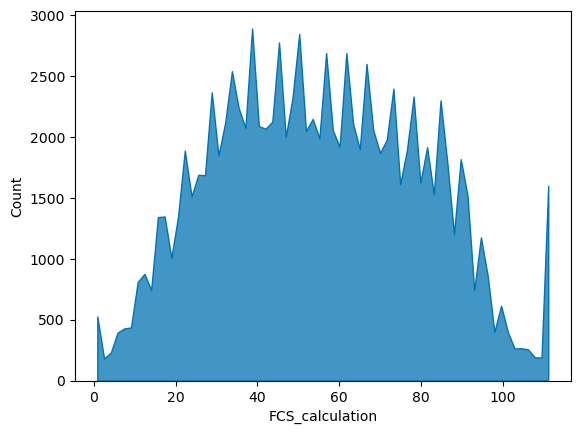

In [143]:
sns.histplot(mergedDataset['FCS_calculation'], element='poly')

In [ ]:
#FIRST INSIGHT: FCS IS NORMALLY DISTRIBUTED

In [150]:
mergedDataset['gender'].value_counts()

Male                    52624
Female                  52541
Prefer not to answer      476
Non-Binary                 42
Name: gender, dtype: int64

In [93]:
mergedDataset.groupby('gender')['FCS_calculation'].agg(['mean','median','std'])

,mean,median,std
gender,,,
Female,55.515788,55.0,24.654117
Male,54.550139,53.5,25.359873
Non-Binary,48.500000,46.0,13.139960
Prefer not to answer,50.636555,46.5,27.185818


<AxesSubplot:xlabel='FCS_category', ylabel='FCS_calculation'>

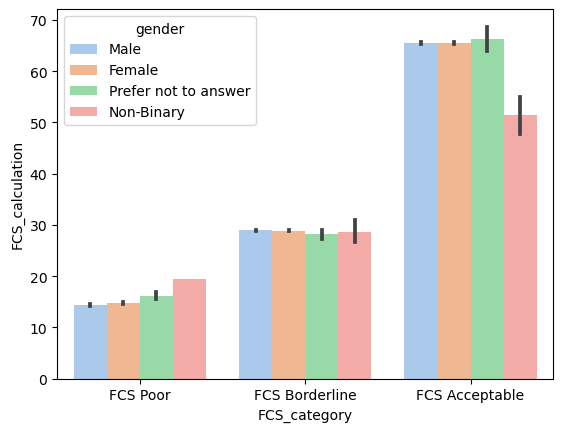

In [152]:
sns.set_palette("pastel")
sns.barplot(data=mergedDataset, y='FCS_calculation', x='FCS_category', hue='gender')

In [ ]:
#SECOND INSIGHT: OVERALL THE FCS SCORE IS HIGHEST AMONG WOMEN AND LOWEST AMONG PEOPLE IDENTIFYING AS NON BINARY BUT THE SAME TENDENCY DOES NOT APPLY WHEN LOOKING AT 3 MAIN FCS CATEGORIES
#I.E. NON- BINARY INDENTIFYING RESPONDEDNTS HAVE HIGHEST FCS WITHIN THE 'POOR' CATEGORY AND LOWEST IN THE 'ACCEPTABLE' CATEGORY

In [89]:
mergedDataset.groupby('geography', sort=False)['FCS_calculation'].agg(['mean','median','std'])

,mean,median,std
geography,,,
Suburban/Peri-urban,55.258102,55.0,24.598889
Rural,48.866210,46.0,25.195943
City center or metropolitan area,57.118070,57.0,24.863836


Text(0, 0.5, 'Raw FCS score')

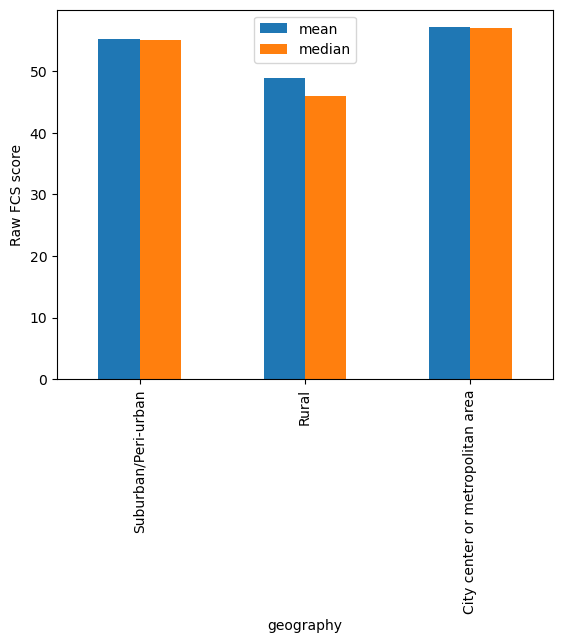

In [95]:
mergedDataset.groupby('geography', sort=False)['FCS_calculation'].agg(['mean','median']).plot.bar()
plt.ylabel('Raw FCS score')

In [ ]:
#THIRD INSIGHT: THE DISTRIBUTION OF FCS FOLLOWS A GEOGRAPHIC PATTERN AND THE AVERAGE THE FCS IS LOWEST IN RURAL AREAS AND HIGHEST IN CITIES OR METROPOLITAN AREAS

In [96]:
mergedDataset.groupby(['geography','avg_distance_traveled_for_food_7days'])['FCS_calculation'].agg(['mean','median'])

mean  \
geography                        avg_distance_traveled_for_food_7days              
City center or metropolitan area .5-1 kilometer                        56.646281   
                                 1-3 kilometers                        55.427902   
                                 3-5 kilometers                        56.967616   
                                 Less than .5 kilometers               59.904269   
                                 More than 5 kilometers                57.352076   
Rural                            .5-1 kilometer                        49.090061   
                                 1-3 kilometers                        47.760190   
                                 3-5 kilometers                        46.895824   
                                 Less than .5 kilometers               48.915004   
                                 More than 5 kilometers                52.071030   
Suburban/Peri-urban              .5-1 kilometer                        54.040619   
                                 1-3 kilometers                        54.163989   
                                 3-5 kilometers                        56.767500   
                                 Less than .5 kilometers               56.764053   
                                 More than 5 kilometers                57.499021   

                                                                       median  
geography                        avg_distance_traveled_for_food_7days          
City center or metropolitan area .5-1 kilometer                          56.5  
                                 1-3 kilometers                          54.0  
                                 3-5 kilometers                          56.0  
                                 Less than .5 kilometers                 61.0  
                                 More than 5 kilometers                  56.5  
Rural                            .5-1 kilometer                          46.0  
                                 1-3 kilometers                          44.5  
                                 3-5 kilometers                          44.5  
                                 Less than .5 kilometers                 47.5  
                                 More than 5 kilometers                  48.5  
Suburban/Peri-urban              .5-1 kilometer                          53.5  
                                 1-3 kilometers                          54.0  
                                 3-5 kilometers                          58.0  
                                 Less than .5 kilometers                 56.5  
                                 More than 5 kilometers                  59.0

In [ ]:
# FOURTH INSIGHT: SURPRISINGLY (!) THE DISTANCE TO THE MARKET IS INVERSLY CORRELATED WITH FCS ACCROSS ALL 3 TYPES OF GEOGRAPHIC RESIDENCE 
#(I.E. THE FURHTER FROM THE MARKET THE HIGHER THE SCORES FOR ALL 3 CATEGORIES)

<AxesSubplot:xlabel='FCS_category', ylabel='Percent'>

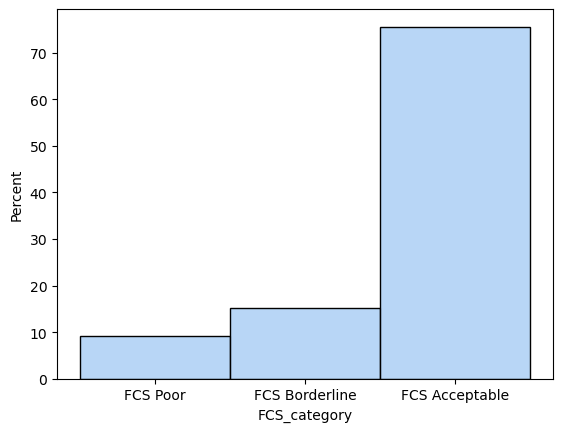

In [153]:
sns.histplot(mergedDataset['FCS_category'], stat= 'percent')

In [ ]:
# FIFTH INSIGHT: OVER 70% OF SURVEYED POPULATION MEETS THE 'ACCEPTABLE FCS' THRESHOLD (AGAINST THE MINIMIM 'SPHERE' STANDARD OF >42%) 

In [52]:
mergedDataset['submission_date']= pd.to_datetime(mergedDataset['submission_date'], infer_datetime_format=True, dayfirst=False, format='%d/%m/%Y')

In [53]:
monthly_summary = mergedDataset.resample('M', on='submission_date')['FCS_calculation'].mean()

In [55]:
mergedDataset.set_index('submission_date').head(2)

,submission_id,gender,age,geography,financial_situation,education,employment_status,submission_state,cereals_plantains_tubers_7days,vegs_7days,...,spend_food_savings_7days,sell_or_exchange_property_7days,work_in_exchange_for_food_7days,food_purchased_7days,food_purchased_from_7days,food_transferred_7days,avg_distance_traveled_for_food_7days,head_household,unique_id,FCS_calculation
submission_date,,,,,,,,,,,,,,,,,,,,,
2020-06-10,5.308580e+15,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,I am doing community or military service,Nueva Esparta,1,4,...,3.0,0.0,4.0,3,Butcher shop^Grocery store^Market,Bicycle^On foot,.5-1 kilometer,Yes,0,41.5
2020-05-29,6.044580e+15,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,I am doing community or military service,Nueva Esparta,2,5,...,2.0,1.0,1.0,1,Market,On foot,.5-1 kilometer,Yes,1,40.0


Text(0.5, 1.0, 'FCS overtime')

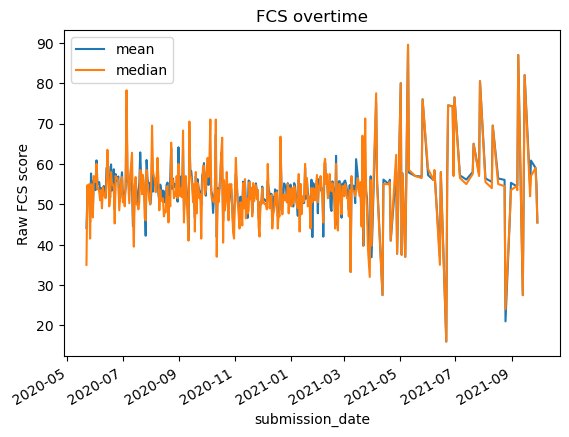

In [97]:
mergedDataset.groupby('submission_date', sort=False)['FCS_calculation'].agg(['mean','median']).plot()
plt.ylabel('Raw FCS score')
plt.title('FCS overtime')

In [ ]:
# SIXTH INSIGHT: HOWEVER, WHEN LOOKING AT THE EVOLUTION OVER TIME WE CAN SEE POTENTIAL EFFECTS OF C-19 (LIKELY HYPOTHESIS) 
# ON QUALITY OF DATA AND RESULTS WITH FREQUENCY OF DATA COLLECTION DECREASING AND HIHGER VARIANCE (SHOULD BE FURTHER EXPLORED- SAMPLING ISSUES?, PHONE BIAS?, PROGRESSING INEUALITY? ETC.) 

In [57]:
mergedDataset.set_index('unique_id').head(2)

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,cereals_plantains_tubers_7days,...,help_from_others_outside_country_7days,spend_food_savings_7days,sell_or_exchange_property_7days,work_in_exchange_for_food_7days,food_purchased_7days,food_purchased_from_7days,food_transferred_7days,avg_distance_traveled_for_food_7days,head_household,FCS_calculation
unique_id,,,,,,,,,,,,,,,,,,,,,
0,5.308580e+15,2020-06-10,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,I am doing community or military service,Nueva Esparta,1,...,0.0,3.0,0.0,4.0,3,Butcher shop^Grocery store^Market,Bicycle^On foot,.5-1 kilometer,Yes,41.5
1,6.044580e+15,2020-05-29,Male,26 to 35 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,I am doing community or military service,Nueva Esparta,2,...,0.0,2.0,1.0,1.0,1,Market,On foot,.5-1 kilometer,Yes,40.0
